In [3]:
%load_ext watermark
%watermark  -d -u -a 'Zining' -v -p numpy,scipy,matplotlib,sklearn

Zining 
last updated: 2020-12-16 

CPython 3.8.5
IPython 7.18.1

numpy 1.19.1
scipy 1.5.0
matplotlib 3.3.1
sklearn 0.23.2


In [148]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
from mlxtend.plotting import heatmap
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
df = pd.read_csv('AmesHousing.csv')
print(df.shape)
df.head()

(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [7]:
# Dealing with missing data
# drop columns with more than 400 missing values
sum_col = df.isnull().sum()
missing_col = sum_col.loc[sum_col.values > 400].index 
df = df.drop(columns=missing_col) 

# drop rows with missing values
sum_row = df.isnull().sum(axis=1)
missing_row = sum_row.loc[sum_row.values > 0].index
df = df.drop(missing_row)
df.shape

(2678, 76)

In [8]:
# One-hot encoding for Categorical(Nominal) Features
df = pd.get_dummies(df, drop_first=True)
print(df.shape)
df.head()

(2678, 241)


,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,31770,6,5,1960,1960,112.0,639.0,...,0,0,0,0,1,0,0,0,1,0
1,2,526350040,20,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
2,3,526351010,20,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
3,4,526353030,20,11160,7,5,1968,1968,0.0,1065.0,...,0,0,0,0,1,0,0,0,1,0
4,5,527105010,60,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0


In [9]:
# Split the data to train, validation, and test data
y = df['SalePrice']
X = df.iloc[:,:-1]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=1, shuffle = 'True')

print('Train/Valid/Test sizes:', y_train.shape[0], y_test.shape[0])

Train/Valid/Test sizes: 2008 670


In [25]:
# GridSearchCV for Random Forest
RF_param_grid = [{'max_depth': [3, 4, 5, 6, 7, 8,9, None],
               'n_estimators': [50, 100, 150,200,250,300,500]}]

RF_gs = GridSearchCV(estimator=RandomForestRegressor(random_state=1),
                  param_grid=RF_param_grid,
                  refit=True,
                  cv=10,
                  n_jobs=-1)

RF_gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (RF_gs.best_score_*100))
print('Best Params:', RF_gs.best_params_)

Best Accuracy: 99.74%
Best Params: {'max_depth': None, 'n_estimators': 50}


In [30]:
# GridSearchCV for Random Forest
RF_param_grid = [{'max_depth': [11,12,13,15, None],
               'n_estimators': [50, 100, 150]}]

RF_gs = GridSearchCV(estimator=RandomForestRegressor(random_state=1),
                  param_grid=RF_param_grid,
                  refit=True,
                  cv=10,
                  n_jobs=-1)

RF_gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (RF_gs.best_score_*100))
print('Best Params:', RF_gs.best_params_)

Best Accuracy: 99.75%
Best Params: {'max_depth': 12, 'n_estimators': 50}


In [152]:
# GridSearchCV for Random Forest
RF_param_grid = [{'max_depth': [5,7,9,10,11,12,13,15, "None"],
               'n_estimators': [50,100,200,300,500]}]

RF_gs = GridSearchCV(estimator=RandomForestRegressor(random_state=1),
                  param_grid=RF_param_grid,
                  refit=True,
                  cv=10,
                  n_jobs=-1)

RF_gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (RF_gs.best_score_*100))
print('Best Params:', RF_gs.best_params_)

Best Accuracy: 99.75%
Best Params: {'max_depth': 12, 'n_estimators': 50}


In [68]:
for i in range(len(RF_gs.cv_results_['mean_test_score'])):
    print(RF_gs.cv_results_['mean_test_score'][i], RF_gs.cv_results_['params'][i])

0.9966160958920259 {'max_depth': 5, 'n_estimators': 50}
0.9968623310742564 {'max_depth': 5, 'n_estimators': 100}
0.9968504424698809 {'max_depth': 5, 'n_estimators': 200}
0.9968674721802107 {'max_depth': 5, 'n_estimators': 300}
0.9968524172530561 {'max_depth': 5, 'n_estimators': 500}
0.9973719395236629 {'max_depth': 7, 'n_estimators': 50}
0.9973184348629914 {'max_depth': 7, 'n_estimators': 100}
0.9973048275118211 {'max_depth': 7, 'n_estimators': 200}
0.9973060581247306 {'max_depth': 7, 'n_estimators': 300}
0.9972536516730581 {'max_depth': 7, 'n_estimators': 500}
0.9973207963897963 {'max_depth': 9, 'n_estimators': 50}
0.9973096601899133 {'max_depth': 9, 'n_estimators': 100}
0.9973391190942926 {'max_depth': 9, 'n_estimators': 200}
0.9973144214372895 {'max_depth': 9, 'n_estimators': 300}
0.9973021898090199 {'max_depth': 9, 'n_estimators': 500}
0.9972114091094253 {'max_depth': 10, 'n_estimators': 50}
0.997269362565129 {'max_depth': 10, 'n_estimators': 100}
0.9972844245423749 {'max_depth': 1

In [76]:
RF_gs.cv_results_['mean_test_score']

array([0.9966161 , 0.99686233, 0.99685044, 0.99686747, 0.99685242,
       0.99737194, 0.99731843, 0.99730483, 0.99730606, 0.99725365,
       0.9973208 , 0.99730966, 0.99733912, 0.99731442, 0.99730219,
       0.99721141, 0.99726936, 0.99728442, 0.9972882 , 0.99726723,
       0.99741388, 0.99724871, 0.99734211, 0.99729443, 0.99729164,
       0.99748882, 0.99742003, 0.99737311, 0.99735312, 0.99732743,
       0.99744345, 0.99733794, 0.9973252 , 0.99732012, 0.99730447,
       0.99744345, 0.99733794, 0.99732521, 0.99731999, 0.99730547,
              nan,        nan,        nan,        nan,        nan])

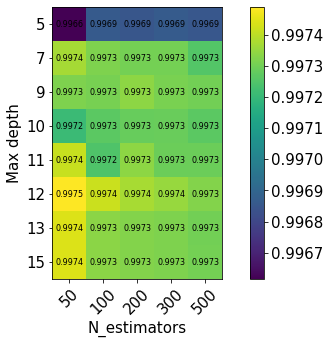

In [82]:
plt.rcParams.update({'font.size': 15})
grid = np.zeros((8, 5))
grid[0, :] = RF_gs.cv_results_['mean_test_score'][:5]
grid[1, :] = RF_gs.cv_results_['mean_test_score'][5:10]
grid[2, :] = RF_gs.cv_results_['mean_test_score'][10:15]
grid[3, :] = RF_gs.cv_results_['mean_test_score'][15:20]
grid[4, :] = RF_gs.cv_results_['mean_test_score'][20:25]
grid[5, :] = RF_gs.cv_results_['mean_test_score'][25:30]
grid[6, :] = RF_gs.cv_results_['mean_test_score'][30:35]
grid[7, :] = RF_gs.cv_results_['mean_test_score'][35:40]

heatmap(grid, 
        figsize=(10,5),
        column_names=[50,100,200,300,500], 
        row_names=[5,7,9,10,11,12,13,15],
        cell_fmt='.4f',
        cell_font_size=8)
plt.ylabel('Max depth')
plt.xlabel('N_estimators')
plt.show()

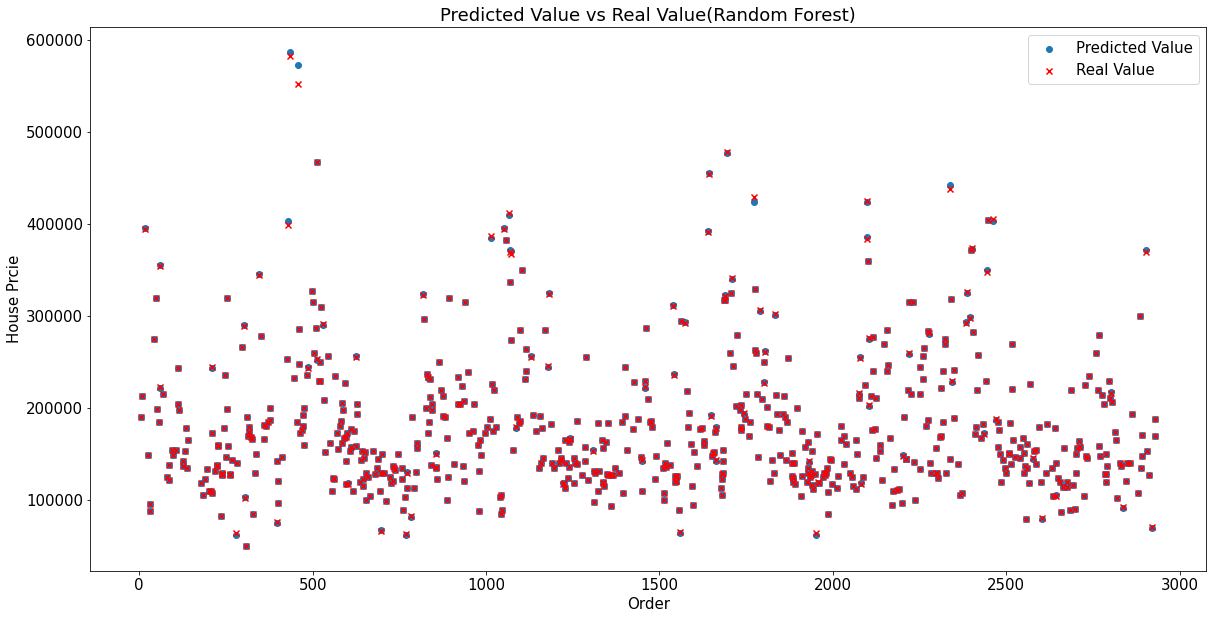

In [162]:
RF_pre_val = RF_gs.best_estimator_.predict(X_test)
plt.scatter(X_test['Order'],RF_pre_val)
plt.title('Predicted Value vs Real Value(Random Forest)')
plt.xlabel('Order')
plt.ylabel('House Prcie')
plt.scatter(X_test['Order'], y_test, color = 'red', marker= 'x')
plt.legend(['Predicted Value','Real Value'])
plt.show()

In [166]:
# Random forest
forest = RandomForestRegressor(n_estimators=50,
                            random_state=1,
                            max_depth = 12, 
                            n_jobs = -1)

model = forest.fit(X_train, y_train)
model.score(X_test, y_test)

0.9998189239770987

In [21]:
# GridSearchCV for XGBoost
XG_param_grid = [{'max_depth': [2, 3, 4, 5, None],
               'objective': ['reg:squarederror'],
               'learning_rate': [0.03,0.05,0.07,0.1],
               'n_estimators': [200,400,500,600]}]

XG_gs = GridSearchCV(estimator=xgb.XGBRegressor(random_state=1),
                  param_grid=XG_param_grid,
                  refit=True,
                  cv=10,
                  n_jobs=-1)

XG_gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (XG_gs.best_score_*100))
print('Best Params:', XG_gs.best_params_)

Best Accuracy: 99.75%
Best Params: {'learning_rate': 0.07, 'max_depth': 4, 'n_estimators': 200, 'objective': 'reg:squarederror'}


In [171]:
# GridSearchCV for XGBoost
XG_param_grid = [{'max_depth': [2, 3, 4, 5, None],
               'objective': ['reg:squarederror'],
               'learning_rate': [0.06,0.07,0.08,0.1],
               'n_estimators': [50,100,150,200,250,300]}]

XG_gs = GridSearchCV(estimator=xgb.XGBRegressor(random_state=1),
                  param_grid=XG_param_grid,
                  refit=True,
                  cv=10,
                  n_jobs=-1)

XG_gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (XG_gs.best_score_*100))
print('Best Params:', XG_gs.best_params_)

Best Accuracy: 99.75%
Best Params: {'learning_rate': 0.07, 'max_depth': 4, 'n_estimators': 300, 'objective': 'reg:squarederror'}


In [55]:
XG_param_grid = [{'max_depth': [2, 3, 4, 5, 6,None],
               'objective': ['reg:squarederror'],
               'learning_rate': [0.03,0.05,0.06,0.07,0.08,0.1],
               'n_estimators': [300]}]

XG_gs = GridSearchCV(estimator=xgb.XGBRegressor(random_state=1),
                  param_grid=XG_param_grid,
                  refit=True,
                  cv=10,
                  n_jobs=-1)

XG_gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (XG_gs.best_score_*100))
print('Best Params:', XG_gs.best_params_)

Best Accuracy: 99.75%
Best Params: {'learning_rate': 0.07, 'max_depth': 4, 'n_estimators': 300, 'objective': 'reg:squarederror'}


In [57]:
for i in range(len(XG_gs.cv_results_['mean_test_score'])):
    print(XG_gs.cv_results_['mean_test_score'][i], XG_gs.cv_results_['params'][i])

0.9967587426895393 {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 300, 'objective': 'reg:squarederror'}
0.9970569381125343 {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 300, 'objective': 'reg:squarederror'}
0.9972717053615163 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 300, 'objective': 'reg:squarederror'}
0.9971351473381981 {'learning_rate': 0.03, 'max_depth': 5, 'n_estimators': 300, 'objective': 'reg:squarederror'}
0.9973248247406279 {'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 300, 'objective': 'reg:squarederror'}
0.9973248247406279 {'learning_rate': 0.03, 'max_depth': None, 'n_estimators': 300, 'objective': 'reg:squarederror'}
0.9968684987984139 {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'objective': 'reg:squarederror'}
0.9971871077629686 {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'objective': 'reg:squarederror'}
0.997176577785447 {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 300, 'objective': '

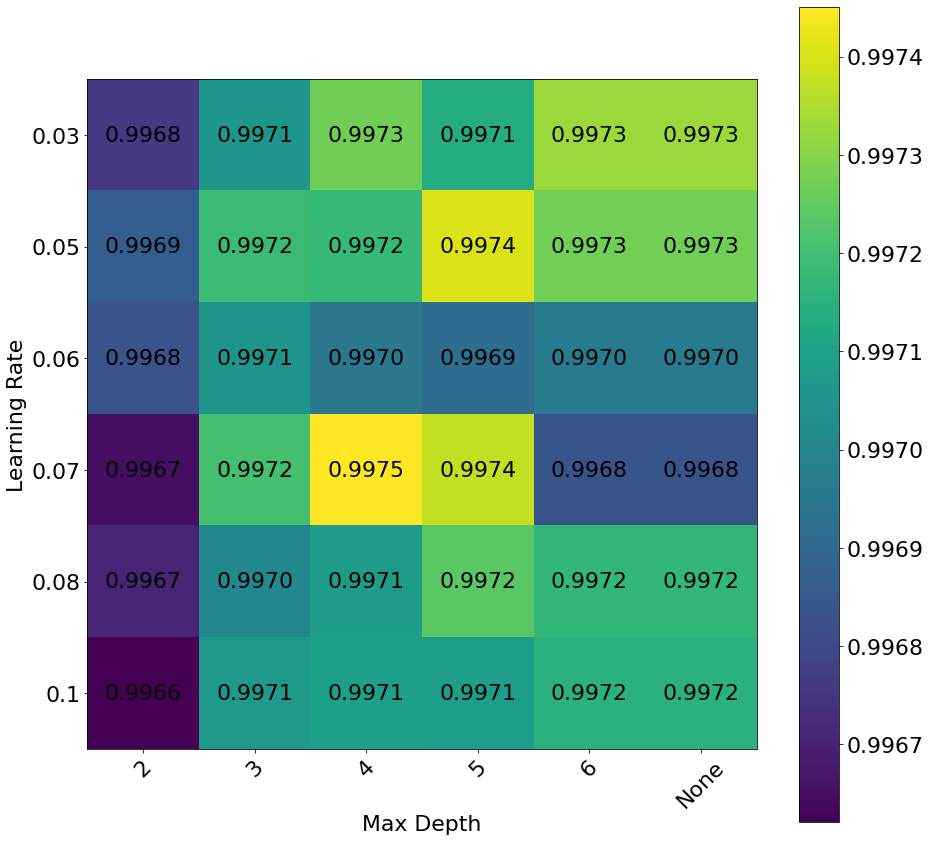

In [164]:
plt.rcParams.update({'font.size': 22})
grid = np.zeros((6, 6))
grid[0, :] = XG_gs.cv_results_['mean_test_score'][:6]
grid[1, :] = XG_gs.cv_results_['mean_test_score'][6:12]
grid[2, :] = XG_gs.cv_results_['mean_test_score'][12:18]
grid[3, :] = XG_gs.cv_results_['mean_test_score'][18:24]
grid[4, :] = XG_gs.cv_results_['mean_test_score'][24:30]
grid[5, :] = XG_gs.cv_results_['mean_test_score'][30:]


heatmap(grid, 
        figsize=(15,15),
        column_names=[2, 3, 4, 5, 6, 'None'], 
        row_names=[0.03,0.05,0.06,0.07,0.08,0.1],
        cell_fmt='.4f',
        cell_font_size=22)
plt.ylabel('Learning Rate')
plt.xlabel('Max Depth')
plt.show()

In [34]:
XG_pre_val = XG_gs.best_estimator_.predict(X_test)
XG_mse = mean_squared_error(np.log(y_test), np.log(pre_val))
XG_rmse = math.sqrt(XG_mse)
print('Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price is ', XG_rmse)

Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price is  0.003016559624059502


In [169]:
xgb_r = xgb.XGBRegressor(objective ='reg:squarederror', 
                        n_estimators = 300,
                        learning_rate = 0.07,
                        max_depth = 4,
                        random_state  = 1) 
  
# Fitting the model 
xgb_r.fit(X_train, y_train) 
# Calutating score
xgb_r.score(X_test, y_test)
# Predict the model 
pred = xgb_r.predict(X_test) 

In [170]:
xgb_r.score(X_test, y_test)

0.999948644199853

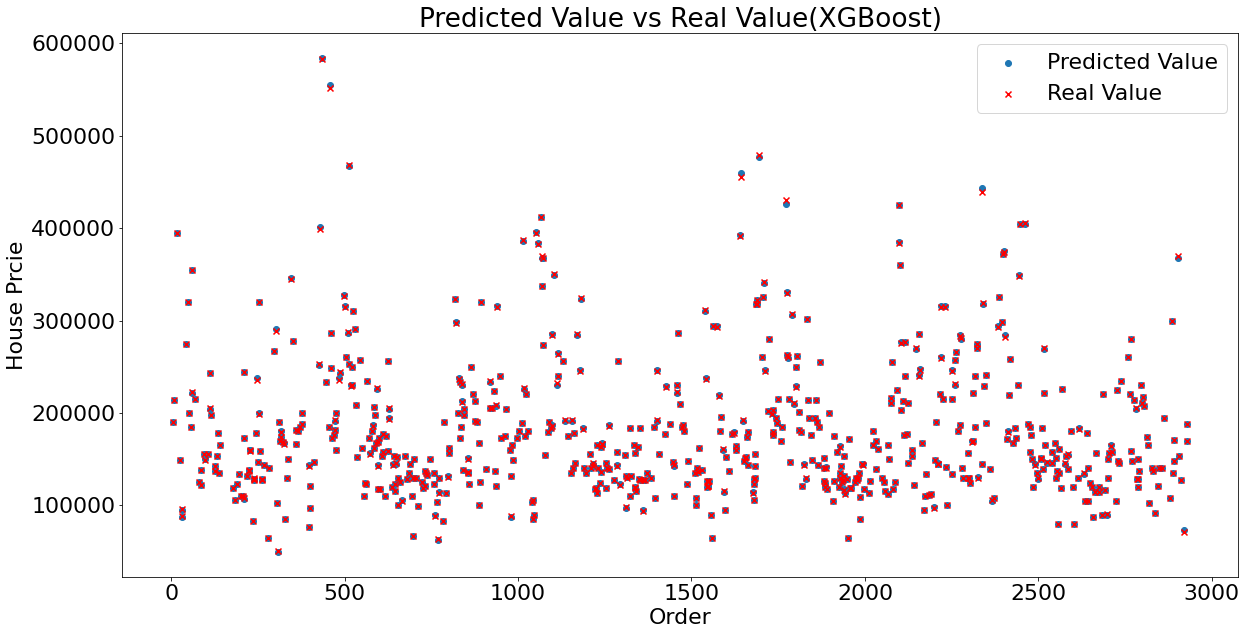

In [165]:
plt.scatter(X_test['Order'],pred)
plt.title('Predicted Value vs Real Value(XGBoost)')
plt.xlabel('Order')
plt.ylabel('House Prcie')
plt.scatter(X_test['Order'], y_test, color = 'red', marker= 'x')
plt.legend(['Predicted Value','Real Value'])
plt.show()